In [1]:
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
train_data = pd.read_json('train.json')
train_data.head()

,giver_username_if_known,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_id,request_number_of_comments_at_retrieval,request_text,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,...,requester_received_pizza,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,requester_user_flair,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
0,N/A,0,1,0,t3_l25d7,0,Hi I am in need of food for my 4 children we a...,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.000000,...,False,[],0,1,0,1,None,nickylvst,1317852607,1317849007
1,N/A,2,5,0,t3_rcb83,0,I spent the last money I had on gas today. Im ...,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.111100,...,False,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,4258,116,11168,None,fohacidal,1332652424,1332648824
2,N/A,0,3,0,t3_lpu5j,0,My girlfriend decided it would be a good idea ...,My girlfriend decided it would be a good idea ...,"[Request] Hungry couple in Dundee, Scotland wo...",0.000000,...,False,[],0,3,0,3,None,jacquibatman7,1319650094,1319646494
3,N/A,0,1,1,t3_mxvj3,4,"It's cold, I'n hungry, and to be completely ho...","It's cold, I'n hungry, and to be completely ho...","[Request] In Canada (Ontario), just got home f...",6.518438,...,False,"[AskReddit, DJs, IAmA, Random_Acts_Of_Pizza]",54,59,76,81,None,4on_the_floor,1322855434,1322855434
4,N/A,6,6,0,t3_1i6486,5,hey guys:\n I love this sub. I think it's grea...,hey guys:\n I love this sub. I think it's grea...,[Request] Old friend coming to visit. Would LO...,162.063252,...,False,"[GayBrosWeightLoss, RandomActsOfCookies, Rando...",1121,1225,1733,1887,None,Futuredogwalker,1373657691,1373654091


In [3]:
train_data.drop(['request_id'], axis=1)

,giver_username_if_known,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_number_of_comments_at_retrieval,request_text,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_account_age_in_days_at_retrieval,...,requester_received_pizza,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,requester_user_flair,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
0,N/A,0,1,0,0,Hi I am in need of food for my 4 children we a...,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.000000,792.420405,...,False,[],0,1,0,1,None,nickylvst,1317852607,1317849007
1,N/A,2,5,0,0,I spent the last money I had on gas today. Im ...,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.111100,1122.279838,...,False,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,4258,116,11168,None,fohacidal,1332652424,1332648824
2,N/A,0,3,0,0,My girlfriend decided it would be a good idea ...,My girlfriend decided it would be a good idea ...,"[Request] Hungry couple in Dundee, Scotland wo...",0.000000,771.616181,...,False,[],0,3,0,3,None,jacquibatman7,1319650094,1319646494
3,N/A,0,1,1,4,"It's cold, I'n hungry, and to be completely ho...","It's cold, I'n hungry, and to be completely ho...","[Request] In Canada (Ontario), just got home f...",6.518438,741.035602,...,False,"[AskReddit, DJs, IAmA, Random_Acts_Of_Pizza]",54,59,76,81,None,4on_the_floor,1322855434,1322855434
4,N/A,6,6,0,5,hey guys:\n I love this sub. I think it's grea...,hey guys:\n I love this sub. I think it's grea...,[Request] Old friend coming to visit. Would LO...,162.063252,308.633819,...,False,"[GayBrosWeightLoss, RandomActsOfCookies, Rando...",1121,1225,1733,1887,None,Futuredogwalker,1373657691,1373654091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,N/A,3,5,0,1,Is anyone out there kind enough to help me out...,Is anyone out there kind enough to help me out...,[REQUEST] Anyone help a recent college grad wh...,0.000000,153.344630,...,False,[],0,4,0,12,None,bstewart88,1373068818,1373065218
4036,N/A,2,5,0,0,If someone could hook me up with a $15 gift ca...,If someone could hook me up with a $15 gift ca...,[Request][USA] Papa Johns is giving away one f...,658.366863,746.955648,...,True,"[AskReddit, CoffeeWithJesus, IAmA, RandomKindn...",738,751,2974,3025,shroom,puddems,1378667174,1378663574
4037,N/A,4,10,1369770892,2,"Have today off, soo I'll be stuck in the house...","Have today off, soo I'll be stuck in the house...","[REQUEST][MI,USA] Day off, would love pizza fo...",410.551736,602.295428,...,False,"[AdviceAnimals, Android, AskReddit, Diablo, HT...",1252,1327,5634,5761,None,Candlejac88,1369754714,1369751114
4038,N/A,2,7,0,4,"I've never done anything like this before, but...","I've never done anything like this before, but...",[Request] Nashua Nh Mother of one hungry 2 yea...,0.000000,647.682940,...,False,[Random_Acts_Of_Pizza],5,13,7,41,None,nhcollegechic,1330357920,1330357920


<AxesSubplot:ylabel='Frequency'>

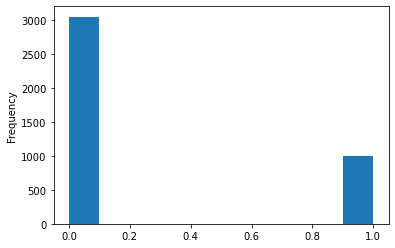

In [4]:
train_data["requester_received_pizza_1or0"] = train_data["requester_received_pizza"].astype(int)
train_data["requester_received_pizza_1or0"].plot.hist()

### requester_account_age_in_days_at_request

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc9d5af67d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc9d5afce10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc9d5af3bd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc9d5b0c310>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc9d5b103d0>,
 'means': []}

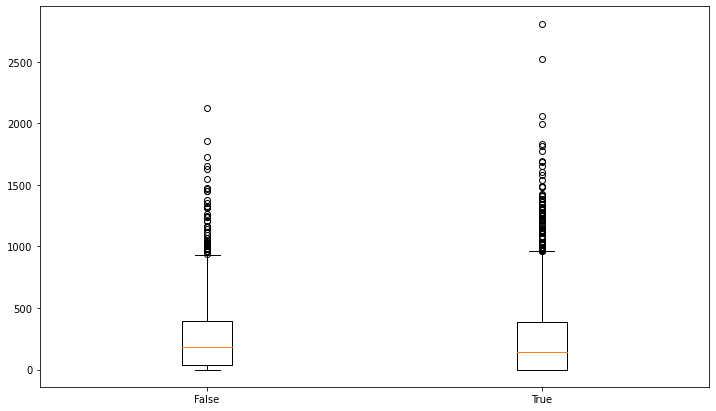

In [5]:
requester_account_age_in_days_at_request_1 = train_data[train_data['requester_received_pizza'] == True]['requester_account_age_in_days_at_request']
requester_account_age_in_days_at_request_0 = train_data[train_data['requester_received_pizza'] == False]['requester_account_age_in_days_at_request']

set_to_plot = [requester_account_age_in_days_at_request_1, requester_account_age_in_days_at_request_0]

labels = train_data['requester_received_pizza'].unique()

fig, ax = plt.subplots(figsize=(12, 7))
ax.boxplot(set_to_plot, labels=labels)

In [6]:
min(train_data["requester_account_age_in_days_at_request"])

0.0

In [7]:
max(train_data["requester_account_age_in_days_at_request"])

2809.750787037037

In [8]:
min(requester_account_age_in_days_at_request_0)

0.0

In [9]:
max(requester_account_age_in_days_at_request_1)

2124.362650462963

In [10]:
max(requester_account_age_in_days_at_request_0)

2809.750787037037

The difference in distribution seems more than the other features analyzed below.

### requester_account_age_in_days_at_retrieval

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc9d5c44050>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc9d5c50e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc9d5c3cf10>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc9d5c59f50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc9d5c5ddd0>,
 'means': []}

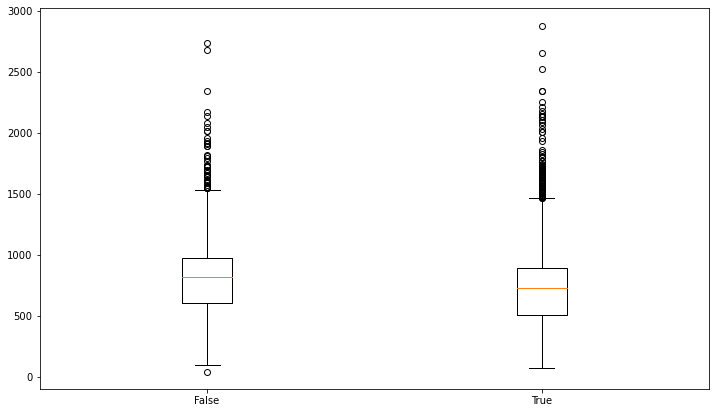

In [11]:
requester_account_age_in_days_at_retrieval_1 = train_data[train_data['requester_received_pizza'] == True]['requester_account_age_in_days_at_retrieval']
requester_account_age_in_days_at_retrieval_0 = train_data[train_data['requester_received_pizza'] == False]['requester_account_age_in_days_at_retrieval']

set_to_plot = [requester_account_age_in_days_at_retrieval_1, requester_account_age_in_days_at_retrieval_0]

labels = train_data['requester_received_pizza'].unique()

fig, ax = plt.subplots(figsize=(12, 7))
ax.boxplot(set_to_plot, labels=labels)

### requester_subreddits_at_request

In [12]:
requester_subreddits_at_request_1 = train_data[train_data['requester_received_pizza'] == True]['requester_subreddits_at_request']
requester_subreddits_at_request_0 = train_data[train_data['requester_received_pizza'] == False]['requester_subreddits_at_request']

Relationship between number of subreddits with activity and altruism

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc9d5d8e890>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc9d5d9b690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc9d5d8aad0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc9d5da9650>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc9d5db0050>,
 'means': []}

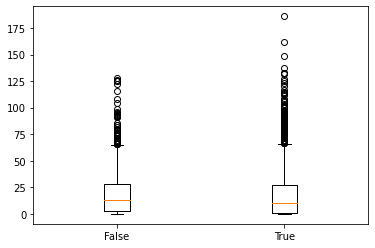

In [13]:
len_requester_subreddits_at_request_1 = []
for r1 in requester_subreddits_at_request_1:
    len_requester_subreddits_at_request_1.append(len(r1))
    
len_requester_subreddits_at_request_0 = []
for r0 in requester_subreddits_at_request_0:
    len_requester_subreddits_at_request_0.append(len(r0))

set_to_plot = [len_requester_subreddits_at_request_1, len_requester_subreddits_at_request_0]

labels = train_data['requester_received_pizza'].unique()

plt.boxplot(set_to_plot, labels=labels)

Relationship between number of "Random" subreddits with activity and altruism

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc9d5d21610>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc9d5d1a390>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc9d5d06750>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc9d5e1b950>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc9d5dec790>,
 'means': []}

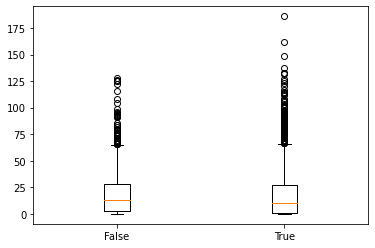

In [14]:
len_random_requester_subreddits_at_request_1 = []
for r1 in requester_subreddits_at_request_1:
    len_random_requester_subreddits_at_request_1.append(len([r for r in r1 if "Random" in r]))
    
    
len_random_requester_subreddits_at_request_0 = []
for r0 in requester_subreddits_at_request_0:
    len_random_requester_subreddits_at_request_0.append(len([r for r in r0 if "Random" in r]))

set_to_plot = [len_requester_subreddits_at_request_1, len_requester_subreddits_at_request_0]

labels = train_data['requester_received_pizza'].unique()

plt.boxplot(set_to_plot, labels=labels)

In [15]:
np.mean(len_random_requester_subreddits_at_request_1)

0.6016096579476862

In [16]:
np.mean(len_random_requester_subreddits_at_request_0)

0.46224556795797767

Relationship between activity in "Random_Acts_Of_Pizza" subreddits and altruism

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc9d5f86910>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc9d5f93810>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc9d5f81c90>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc9d5f9bd50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc9d5fa1b90>,
 'means': []}

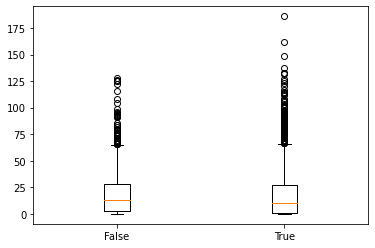

In [17]:
len_random_requester_subreddits_at_request_1 = []
for r1 in requester_subreddits_at_request_1:
    len_random_requester_subreddits_at_request_1.append(len([r for r in r1 if "Random_Acts_Of_Pizza" in r]))
    
len_random_requester_subreddits_at_request_0 = []
for r0 in requester_subreddits_at_request_0:
    len_random_requester_subreddits_at_request_0.append(len([r for r in r0 if "Random_Acts_Of_Pizza" in r]))

set_to_plot = [len_requester_subreddits_at_request_1, len_requester_subreddits_at_request_0]

labels = train_data['requester_received_pizza'].unique()

plt.boxplot(set_to_plot, labels=labels)

### requester_upvotes_minus_downvotes_at_request

0          0
1         34
2          0
3         54
4       1121
        ... 
4034     119
4035       0
4037    1252
4038       5
4039    3212
Name: requester_upvotes_minus_downvotes_at_request, Length: 3046, dtype: int64


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc9d68ea810>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc9d68fd610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc9d68ea0d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc9d690a250>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc9d690e410>,
 'means': []}

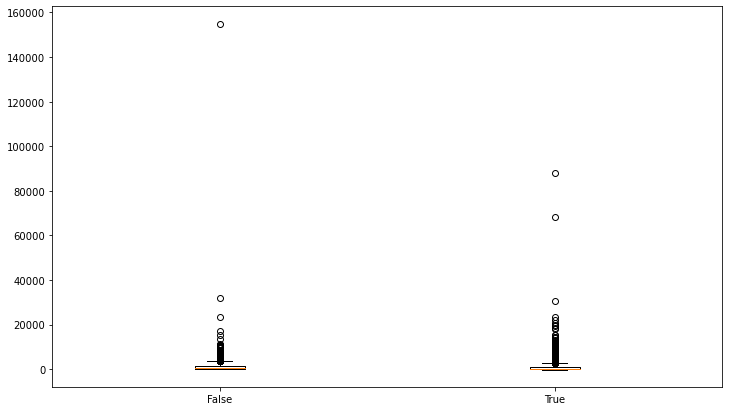

In [18]:
requester_upvotes_minus_downvotes_at_request_1 = train_data[train_data['requester_received_pizza'] == True]['requester_upvotes_minus_downvotes_at_request']
requester_upvotes_minus_downvotes_at_request_0 = train_data[train_data['requester_received_pizza'] == False]['requester_upvotes_minus_downvotes_at_request']

print(requester_upvotes_minus_downvotes_at_request_0)

set_to_plot = [requester_upvotes_minus_downvotes_at_request_1, requester_upvotes_minus_downvotes_at_request_0]

labels = train_data['requester_received_pizza'].unique()

fig, ax = plt.subplots(figsize=(12, 7))
ax.boxplot(set_to_plot, labels=labels)

In [46]:
requester_upvotes_minus_downvotes_at_request_1 = train_data[train_data['requester_received_pizza'] == True]['requester_upvotes_minus_downvotes_at_request']
requester_upvotes_minus_downvotes_at_request_0 = train_data[train_data['requester_received_pizza'] == False]['requester_upvotes_minus_downvotes_at_request']
print(len(requester_upvotes_minus_downvotes_at_request_1))
#removing outliers
z = np.abs(stats.zscore(requester_upvotes_minus_downvotes_at_request_1))
#print(z)
requester_upvotes_minus_downvotes_at_request_1_removed_outliers = requester_upvotes_minus_downvotes_at_request_1.where(z < 2)
print(len(requester_upvotes_minus_downvotes_at_request_1_removed_outliers))

print(len(requester_upvotes_minus_downvotes_at_request_0))
#removing outliers
z = np.abs(stats.zscore(requester_upvotes_minus_downvotes_at_request_0))
#print(z)
requester_upvotes_minus_downvotes_at_request_0_removed_outliers = requester_upvotes_minus_downvotes_at_request_0.where(z < 2)
print(len(requester_upvotes_minus_downvotes_at_request_0_removed_outliers))

994
994
3046
3046


In [19]:
np.mean(requester_upvotes_minus_downvotes_at_request_1)

1372.0603621730381

In [20]:
np.mean(requester_upvotes_minus_downvotes_at_request_0)

1090.9044648719632

### requester_upvotes_minus_downvotes_at_retrieval

0          1
1       4258
2          3
3         59
4       1225
        ... 
4034    7460
4035       4
4037    1327
4038      13
4039    3616
Name: requester_upvotes_minus_downvotes_at_retrieval, Length: 3046, dtype: int64


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc9d6a4af50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc9d6a55290>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc9d6a429d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc9d6a60390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc9d6a64d90>,
 'means': []}

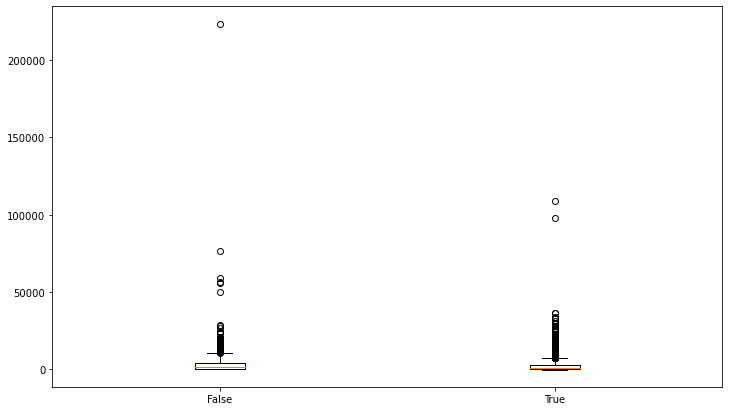

In [21]:
requester_upvotes_minus_downvotes_at_retrieval_1 = train_data[train_data['requester_received_pizza'] == True]['requester_upvotes_minus_downvotes_at_retrieval']
requester_upvotes_minus_downvotes_at_retrieval_0 = train_data[train_data['requester_received_pizza'] == False]['requester_upvotes_minus_downvotes_at_retrieval']

print(requester_upvotes_minus_downvotes_at_retrieval_0)

set_to_plot = [requester_upvotes_minus_downvotes_at_retrieval_1, requester_upvotes_minus_downvotes_at_retrieval_0]

labels = train_data['requester_received_pizza'].unique()

fig, ax = plt.subplots(figsize=(12, 7))
ax.boxplot(set_to_plot, labels=labels)

In [22]:
np.mean(requester_upvotes_minus_downvotes_at_retrieval_1)

3572.609657947686

In [23]:
np.mean(requester_upvotes_minus_downvotes_at_retrieval_0)

2442.2219304005253

### requester_upvotes_plus_downvotes_at_request

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc9d6b4db50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc9d6b57750>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc9d6b4d2d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc9d6b65610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc9d6b6b190>,
 'means': []}

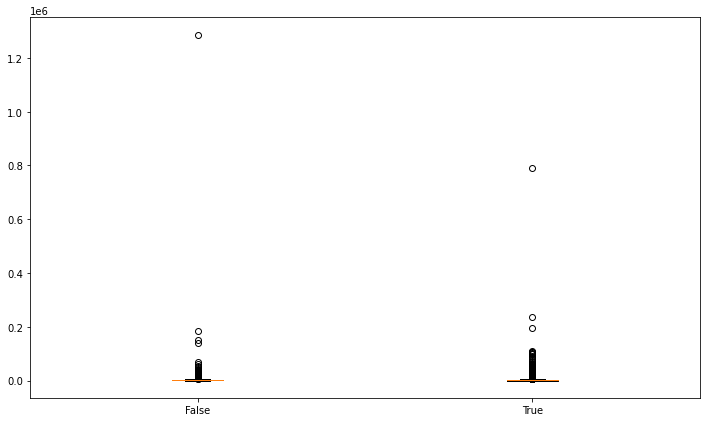

In [24]:
requester_upvotes_plus_downvotes_at_request_1 = train_data[train_data['requester_received_pizza'] == True]['requester_upvotes_plus_downvotes_at_request']
requester_upvotes_plus_downvotes_at_request_0 = train_data[train_data['requester_received_pizza'] == False]['requester_upvotes_plus_downvotes_at_request']

set_to_plot = [requester_upvotes_plus_downvotes_at_request_1, requester_upvotes_plus_downvotes_at_request_0]

labels = train_data['requester_received_pizza'].unique()

fig, ax = plt.subplots(figsize=(12, 7))
ax.boxplot(set_to_plot, labels=labels)

In [25]:
np.mean(requester_upvotes_plus_downvotes_at_request_1)

4923.7002012072435

In [26]:
np.mean(requester_upvotes_plus_downvotes_at_request_0)

3358.015430072226

### requester_upvotes_plus_downvotes_at_retrieval

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc9d6c945d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc9d6c9da10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc9d6c8f050>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc9d6ca8910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc9d6caed90>,
 'means': []}

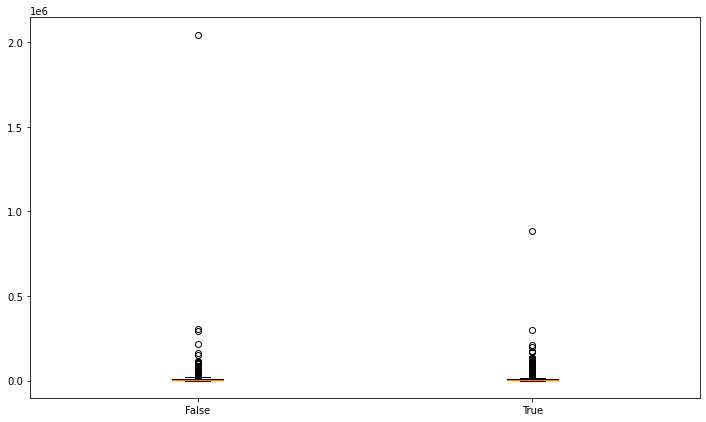

In [27]:
requester_upvotes_plus_downvotes_at_retrieval_1 = train_data[train_data['requester_received_pizza'] == True]['requester_upvotes_plus_downvotes_at_retrieval']
requester_upvotes_plus_downvotes_at_retrieval_0 = train_data[train_data['requester_received_pizza'] == False]['requester_upvotes_plus_downvotes_at_retrieval']

set_to_plot = [requester_upvotes_plus_downvotes_at_retrieval_1, requester_upvotes_plus_downvotes_at_retrieval_0]

labels = train_data['requester_received_pizza'].unique()

fig, ax = plt.subplots(figsize=(12, 7))
ax.boxplot(set_to_plot, labels=labels)

In [28]:
np.mean(requester_upvotes_plus_downvotes_at_retrieval_1)

10941.207243460765

In [29]:
np.mean(requester_upvotes_plus_downvotes_at_retrieval_0)

6759.106369008536